# Diabetes Classification

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
 
style.use('seaborn')

%matplotlib inline

In [2]:
df_diabetes = pd.read_csv("./data/diabetes.csv")

In [3]:
df_diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'

X = df_diabetes[features]
y = df_diabetes[target]

In [5]:
X.shape,y.shape

((15000, 8), (15000,))

In [6]:
def plot_distribution(dataset):
    try:
        print("Field name :",dataset.name)
    except Exception as e:
        pass
    min_value = dataset.min()
    max_value = dataset.max()
    mean_value = dataset.mean()
    median_value = dataset.median()
    mode_value = dataset.mode()[0]
    
    print(f"""
    Minimum Value : {min_value} 
    Maximum Value : {max_value}
    Median        : {median_value}
    Mode Value    : {mode_value}
    Mean Value    : {mean_value}
    """)
    
    fig, ax = plt.subplots(3,1,figsize=(12,12))
    
    ax[0].hist(dataset.values)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)


    ax[1].boxplot(dataset,vert=False)
    ax[1].set_xlabel('Value')
    
    sns.distplot(dataset,kde=True,hist=True)
    ax[2].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)
    
    fig.suptitle(dataset.name)

    plt.show()

Field name : Pregnancies

    Minimum Value : 0 
    Maximum Value : 14
    Median        : 2.0
    Mode Value    : 0
    Mean Value    : 3.2245333333333335
    


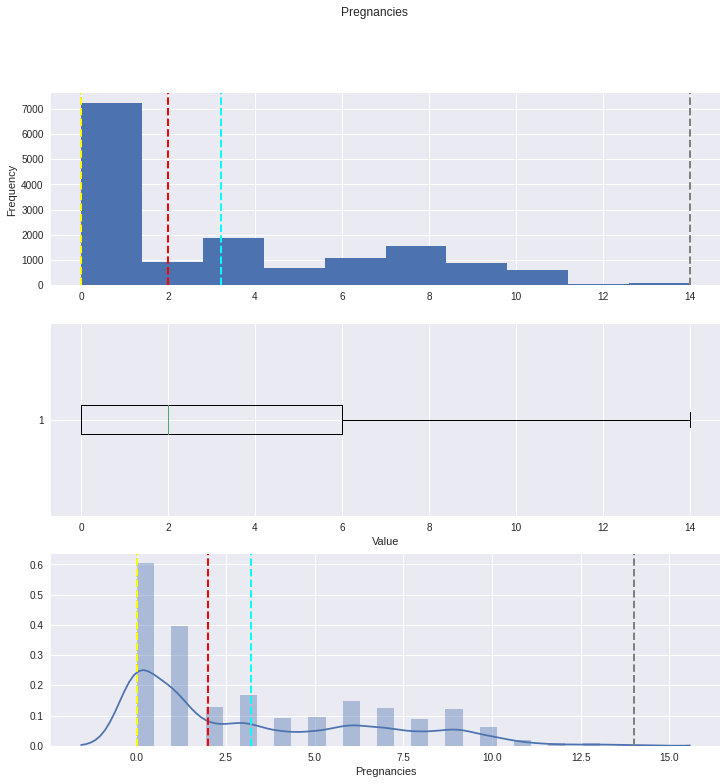

________________________________________________________________________________________________
Field name : PlasmaGlucose

    Minimum Value : 44 
    Maximum Value : 192
    Median        : 104.0
    Mode Value    : 97
    Mean Value    : 107.85686666666666
    


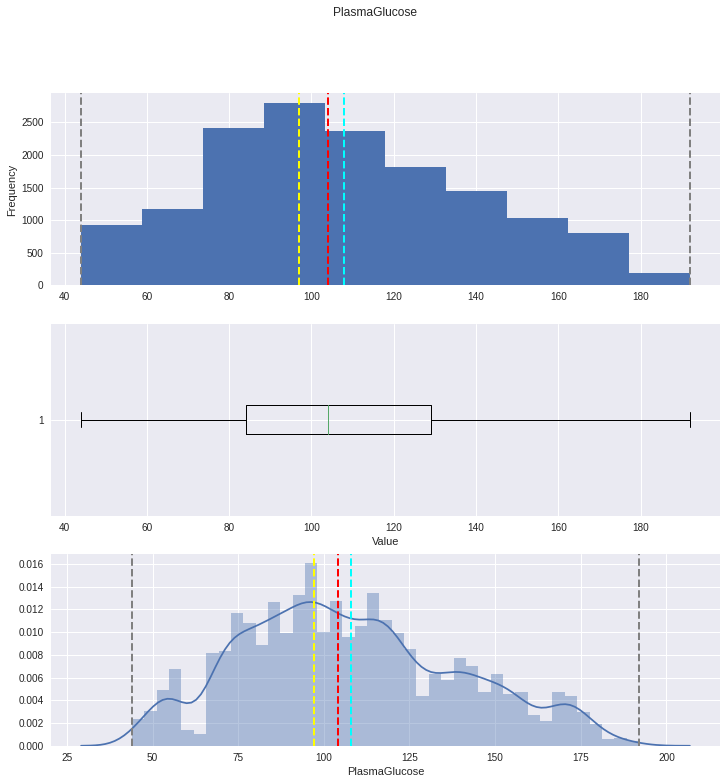

________________________________________________________________________________________________
Field name : DiastolicBloodPressure

    Minimum Value : 24 
    Maximum Value : 117
    Median        : 72.0
    Mode Value    : 81
    Mean Value    : 71.22066666666667
    


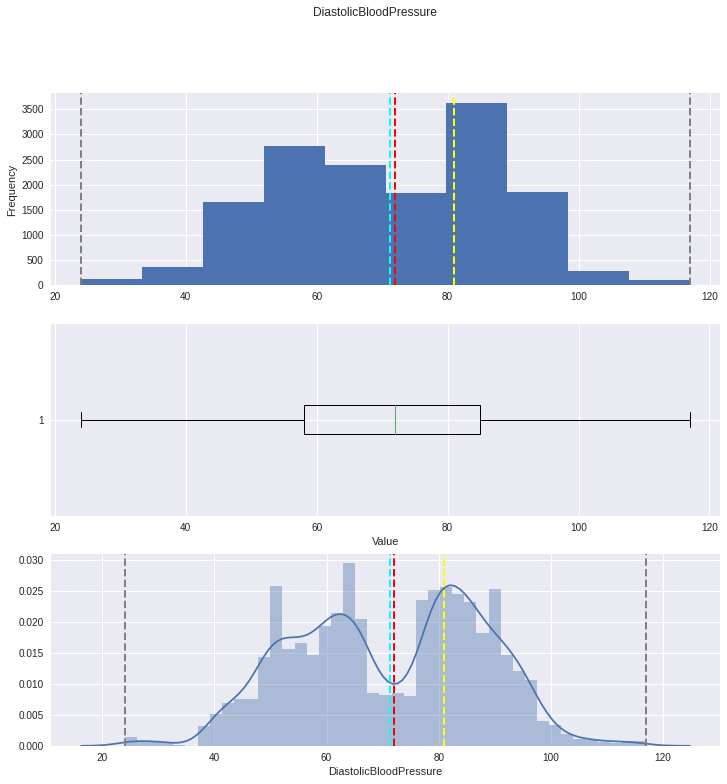

________________________________________________________________________________________________
Field name : TricepsThickness

    Minimum Value : 7 
    Maximum Value : 93
    Median        : 31.0
    Mode Value    : 11
    Mean Value    : 28.814
    


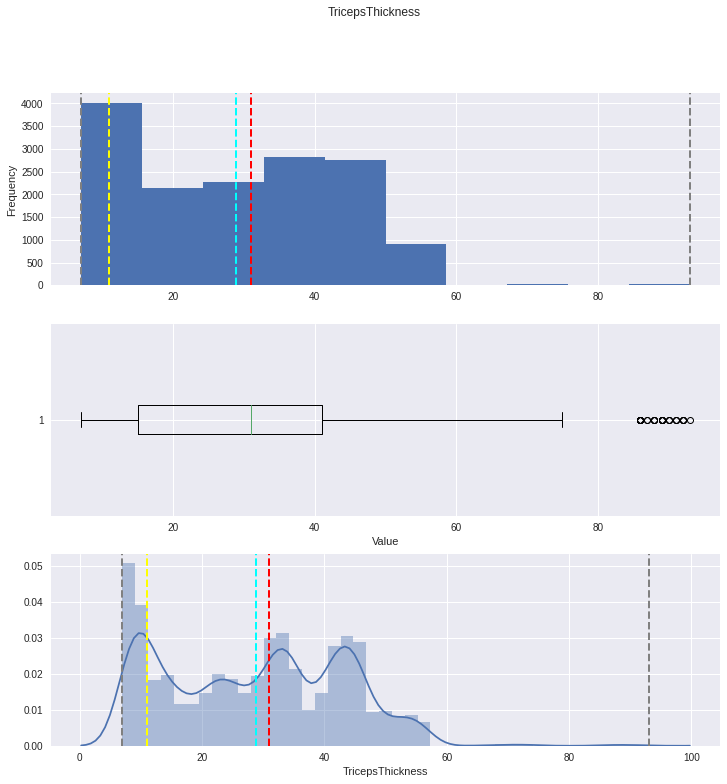

________________________________________________________________________________________________
Field name : SerumInsulin

    Minimum Value : 14 
    Maximum Value : 799
    Median        : 83.0
    Mode Value    : 27
    Mean Value    : 137.85213333333334
    


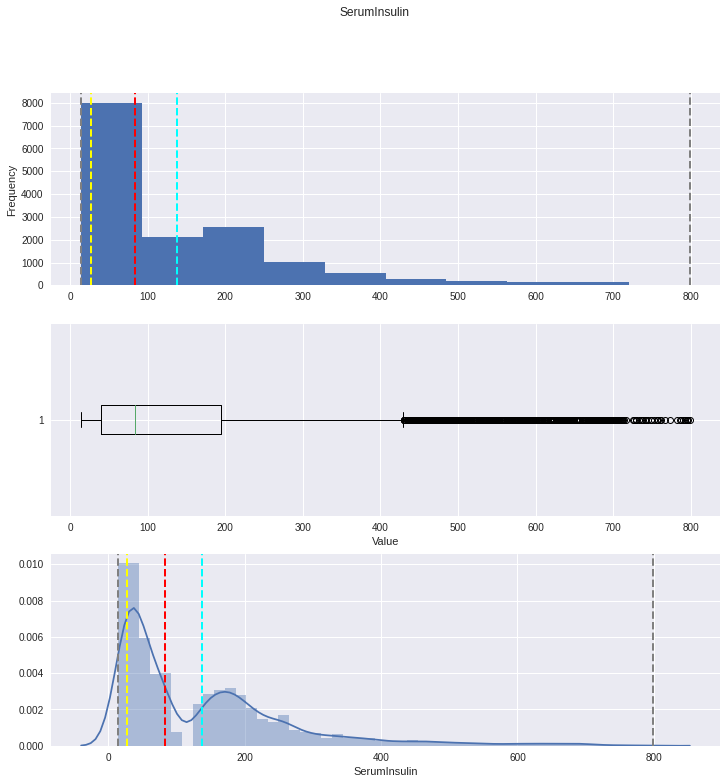

________________________________________________________________________________________________
Field name : BMI

    Minimum Value : 18.20051152 
    Maximum Value : 56.03462763
    Median        : 31.76794047
    Mode Value    : 18.20051152
    Mean Value    : 31.509646041017334
    


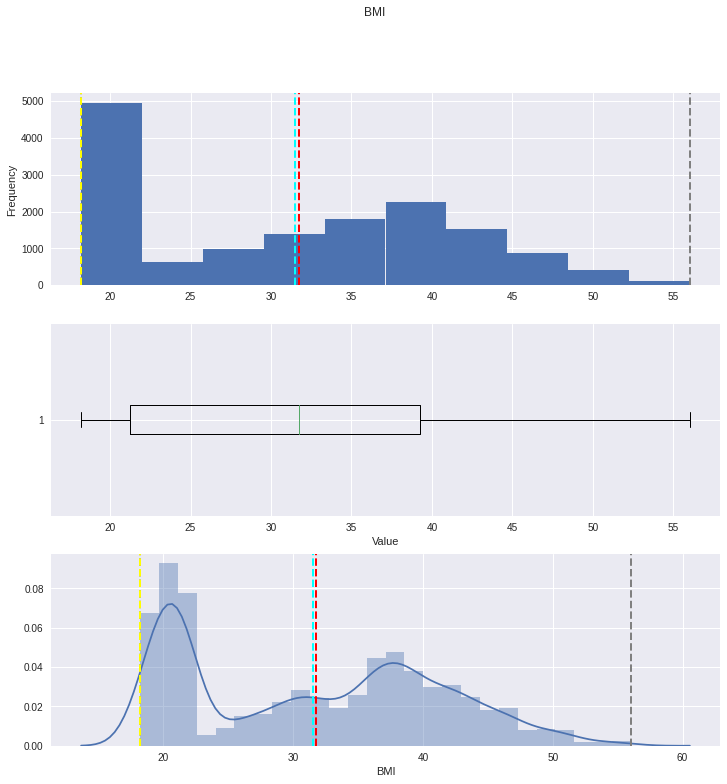

________________________________________________________________________________________________
Field name : DiabetesPedigree

    Minimum Value : 0.078043795 
    Maximum Value : 2.3015941890000002
    Median        : 0.20029707349999998
    Mode Value    : 0.296749351
    Mean Value    : 0.39896774895660014
    


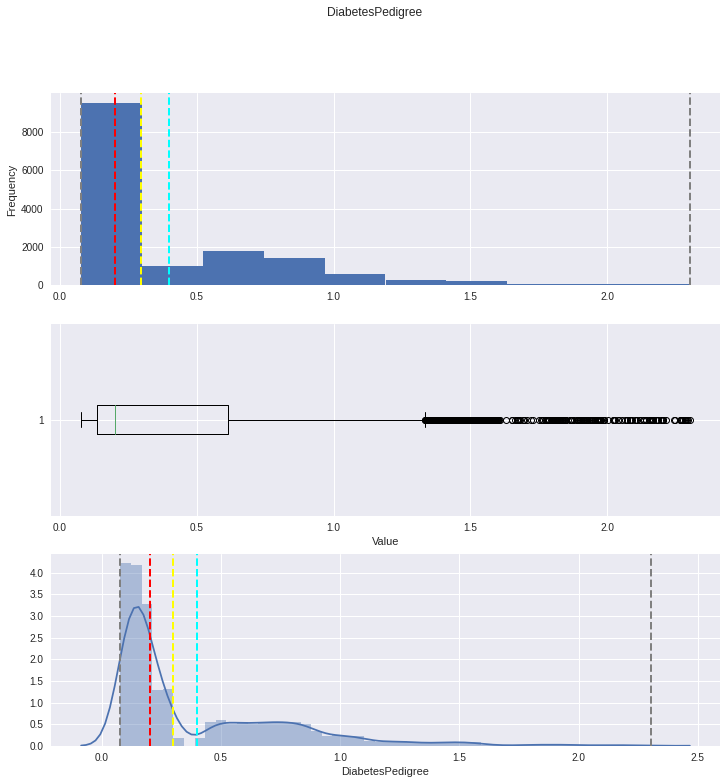

________________________________________________________________________________________________
Field name : Age

    Minimum Value : 21 
    Maximum Value : 77
    Median        : 24.0
    Mode Value    : 21
    Mean Value    : 30.137733333333333
    


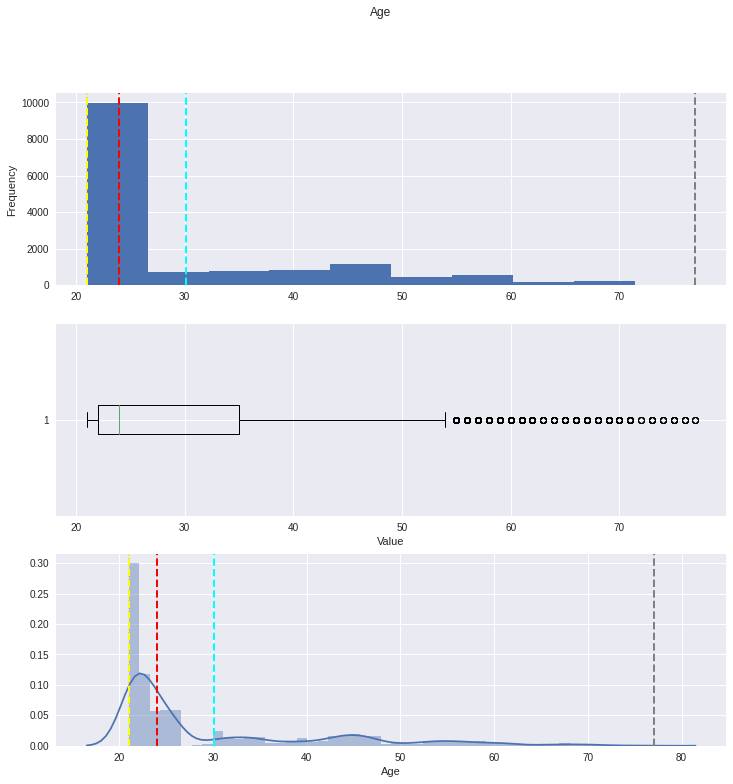

________________________________________________________________________________________________


In [7]:
for i in features:
    plot_distribution(df_diabetes[i])
    print("________________________________________________________________________________________________")

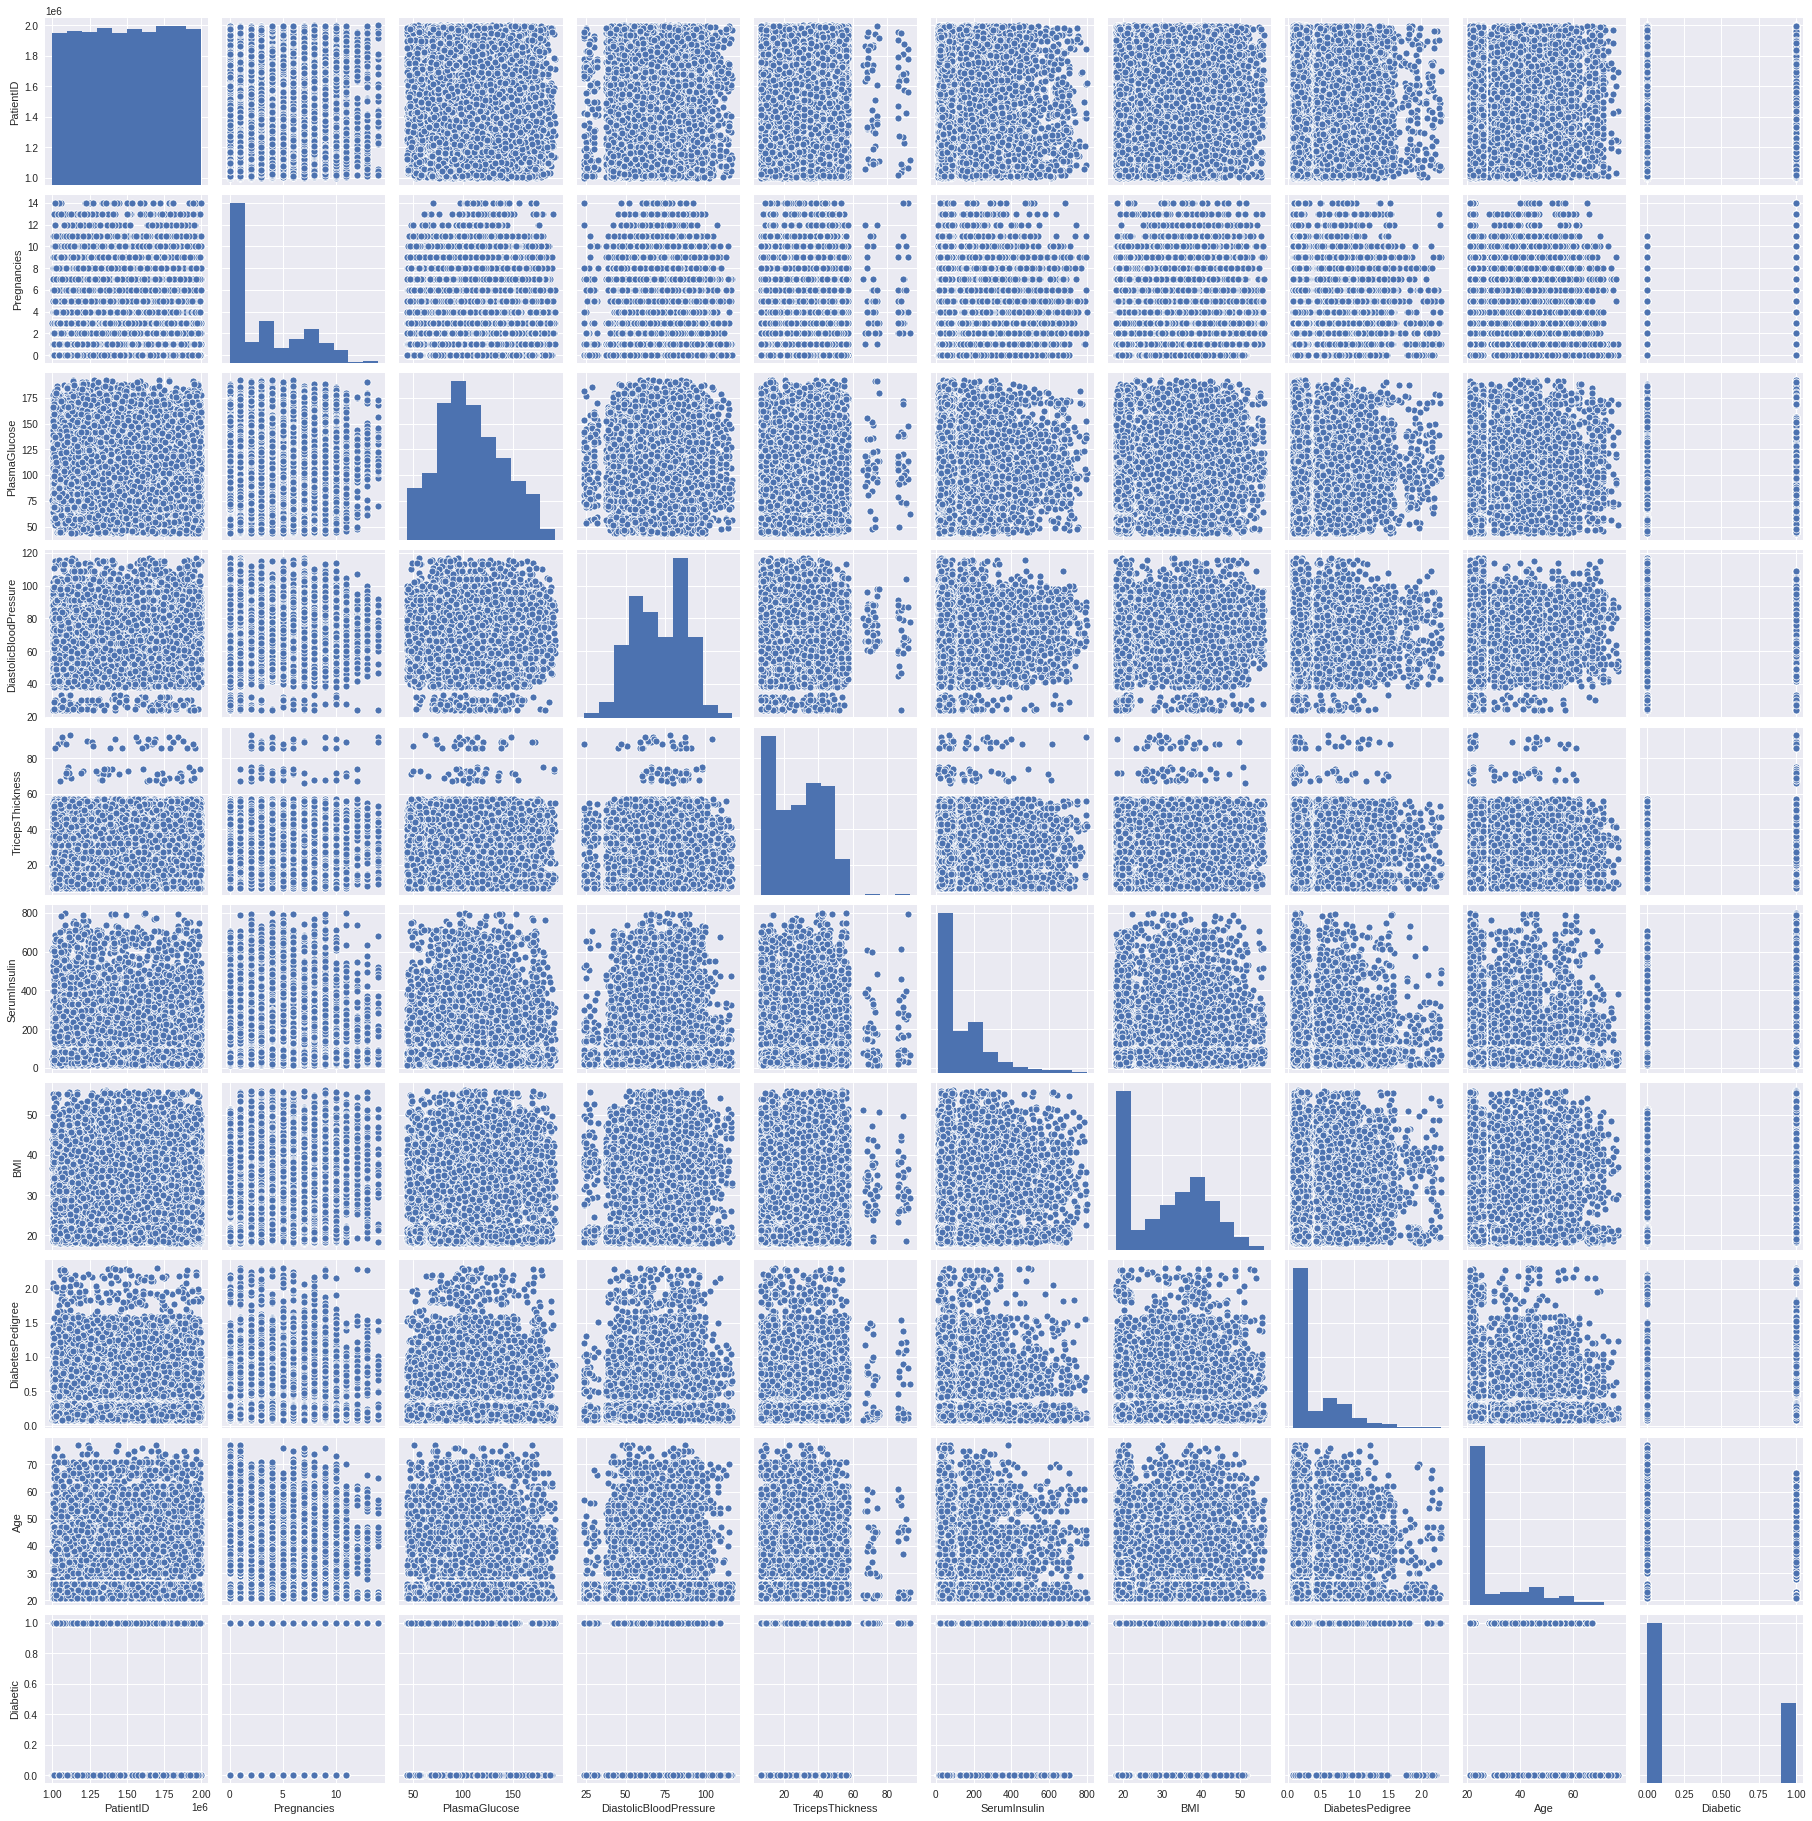

In [8]:
sns.pairplot(df_diabetes)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=0)

print(X_train.shape,X_test.shape)

(10500, 8) (4500, 8)


## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression


logistic_regression_model = LogisticRegression(C=100,solver='liblinear').fit(X_train,y_train)

In [11]:
print(logistic_regression_model)

LogisticRegression(C=100, solver='liblinear')


In [12]:
predictions = logistic_regression_model.predict(X_test)

### Accuracy score

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7893333333333333

### Classification report


- Precision: Of the predictions the model made for this class, what proportion were correct?
- Recall: Out of all of the instances of this class in the test dataset, what proportion did the model identify?
- F1-Score: An average metric that takes both precision and recall into account.
- Support: How many instances of this class are there in the test dataset?


$
Precision = \frac{TP}{TP+FP} \\
TP+FP = number of predictive +ve \\
$

$
Recall = \frac{TP}{TP+FN} \\
TP+FN = number of actual +ve \\
$


$F_1 score = 2\frac{{Precision}.{Recall}}{Precision + Recall}$


Because this is a binary classification problem, the 1 class is considered positive and its precision and recall are particularly interesting - these in effect answer the questions:

    Of all the patients the model predicted are diabetic, how many are actually diabetic?
    Of all the patients that are actually diabetic, how many did the model identify?


In [14]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



### Precision and Recall

In [15]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


### Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


### Prediction Probabilities

In [17]:
y_scores = logistic_regression_model.predict_proba(X_test)
print(y_scores)

[[0.81657749 0.18342251]
 [0.96303915 0.03696085]
 [0.80873957 0.19126043]
 ...
 [0.60693276 0.39306724]
 [0.1065467  0.8934533 ]
 [0.63858497 0.36141503]]


### Receiver operating characteristic (ROC) 
The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

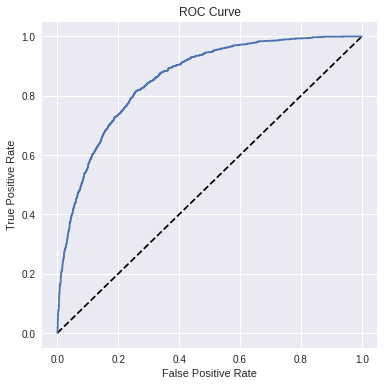

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### AUC score

In [19]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568436056949161


### Model Pipeline

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression


numeric_transformer = Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
) 

categorical_transformer = Pipeline(
    steps=[
        ('encoder',OneHotEncoder())
    ]
) 

preprocessing = ColumnTransformer(
    transformers=[
        ('numerical',numeric_transformer,[0,1,2,3,4,5,6]),
        ('categorical',categorical_transformer,[7])
    ]
)

In [28]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('logistic regression',LogisticRegression(C=100,solver='liblinear'))
    ]
)

model = model_pipeline.fit(X_train,y_train)
print(model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  [7])])),
                ('logistic regression',
                 LogisticRegression(C=100, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2986
           1       0.78      0.73      0.75      1514

    accuracy                           0.84      4500
   macro avg       0.82      0.81      0.82      4500
weighted avg       0.84      0.84      0.84      4500

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202438327341774


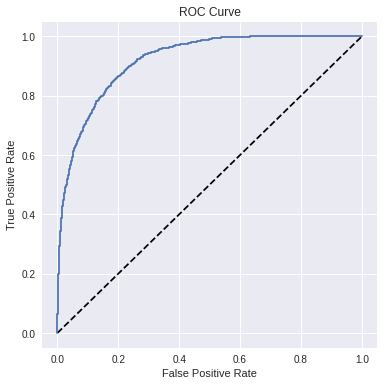

In [36]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix, 
    precision_score, 
    recall_score, 
    roc_auc_score,
    roc_curve
)

# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Classification Report :\n',classification_report(y_test,predictions))
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Random Forest Classification

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder',OneHotEncoder())])
preprocessing = ColumnTransformer(transformers=[('numeric',numeric_transformer,[0,1,2,3,4,5,6]),('categorical',categorical_transformer,[7])])

model_pipeline = Pipeline(steps=[('preprocess',preprocessing),('Random Forest',RandomForestClassifier(n_estimators=100))])

model = model_pipeline.fit(X_train,y_train)

print(model)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  [7])])),
                ('Random Forest', RandomForestClassifier())])


Confusion Matrix:
 [[2864  122]
 [ 177 1337]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2986
           1       0.92      0.88      0.90      1514

    accuracy                           0.93      4500
   macro avg       0.93      0.92      0.92      4500
weighted avg       0.93      0.93      0.93      4500

Accuracy: 0.9335555555555556
Overall Precision: 0.9163810829335161
Overall Recall: 0.8830911492734478
AUC: 0.981850462882266


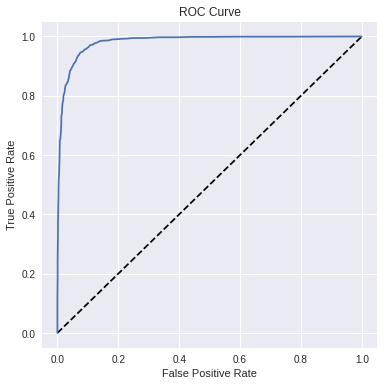

In [48]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix, 
    precision_score, 
    recall_score, 
    roc_auc_score,
    roc_curve
)

# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Classification Report :\n',classification_report(y_test,predictions))
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()